In [1]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
from skimage.measure import find_contours
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random

In [2]:
# Mi libreria:
from processLIDC import Patient

In [3]:
# vuelvo a instanciar:
patient = Patient("LIDC-IDRI-0013")
patient.scale()

Loading dicom files ... This may take a moment.


Importamos el modelo del cerebro preenrenado:

In [4]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
                       in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in /home/faraujo/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


## Entrenar un batch

In [5]:
## Metodos y atributos del modelo de pytorch:
ll = ['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_block', '_buffers', '_call_impl', '_forward_hooks', '_forward_pre_hooks', '_get_backward_hooks', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set', '_parameters', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_replicate_for_data_parallel', '_save_to_state_dict', '_slow_forward', '_state_dict_hooks', '_version', 'add_module', 'apply', 'bfloat16', 'bottleneck', 'buffers', 'children', 'conv', 'cpu', 'cuda', 'decoder1', 'decoder2', 'decoder3', 'decoder4', 'double', 'dump_patches', 'encoder1', 'encoder2', 'encoder3', 'encoder4', 'eval', 'extra_repr', 'float', 'forward', 'get_buffer', 'get_extra_state', 'get_parameter', 'get_submodule', 'half', 'load_state_dict', 'modules', 'named_buffers', 'named_children', 'named_modules', 'named_parameters', 'parameters', 'pool1', 'pool2', 'pool3', 'pool4', 'register_backward_hook', 'register_buffer', 'register_forward_hook', 'register_forward_pre_hook', 'register_full_backward_hook', 'register_module', 'register_parameter', 'requires_grad_', 'set_extra_state', 'share_memory', 'state_dict', 'to', 'to_empty', 'train', 'training', 'type', 'upconv1', 'upconv2', 'upconv3', 'upconv4', 'xpu', 'zero_grad']
for l in ll:
    if not '_' == l[0]:
        print(l)

T_destination
add_module
apply
bfloat16
bottleneck
buffers
children
conv
cpu
cuda
decoder1
decoder2
decoder3
decoder4
double
dump_patches
encoder1
encoder2
encoder3
encoder4
eval
extra_repr
float
forward
get_buffer
get_extra_state
get_parameter
get_submodule
half
load_state_dict
modules
named_buffers
named_children
named_modules
named_parameters
parameters
pool1
pool2
pool3
pool4
register_backward_hook
register_buffer
register_forward_hook
register_forward_pre_hook
register_full_backward_hook
register_module
register_parameter
requires_grad_
set_extra_state
share_memory
state_dict
to
to_empty
train
training
type
upconv1
upconv2
upconv3
upconv4
xpu
zero_grad


In [6]:
imgs, mask = patient.get_tensors(scaled=True)

In [7]:
# # Definir función de pérdida
# loss_fn = nn.BCELoss()

# # Definir optimizador
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# n_slices = 10
# primera = 88-n_slices
# ultima = 88+n_slices
# dataset = TensorDataset(imgs[primera:ultima], mask[primera:ultima])

# # Lista para almacenar la pérdida de entrenamiento
# train_loss_history = []

# # Crear el train_loader
# batch_size = 4
# train_loader = DataLoader(dataset,batch_size=9, shuffle=True)
# for epoch in range(20):

#     for batch_idx, (data, target) in enumerate(train_loader):
#         # print(data.shape, target.shape)
#         # # Forward pass
#         output = model(data)
#         # Calcular pérdida
#         # plt.imshow(target[0])
#         # plt.show()
#         # print(data.shape, target.shape, output.shape)
#         loss = loss_fn(output[:,0], target)

#         # # # Calcular gradientes y actualizar parámetros
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         train_loss_history.append(loss.item())

#         # Imprimir progreso
#         if batch_idx % 10 == 0:
#             print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#                 epoch, batch_idx * len(data), len(train_loader.dataset),
#                 100. * batch_idx / len(train_loader), loss.item()))


In [8]:
# plt.plot(np.log(np.array(train_loss_history)), label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

## Probemoslo:

In [9]:
# imgs, mask = patient.get_tensors(scaled=True)

In [10]:
# # slices:
# # primera = 164
# # ultima = 189

# # Predecir:
# pred = model(imgs[primera:ultima])
# pred = torch.round(pred).detach().numpy()

In [11]:
# imgs[primera:ultima].shape

In [12]:
# for i in range(20):
#     plt.imshow(pred[i].reshape(256,-1)+0.3*np.array(imgs[primera+i, 0]))
#     plt.title('prediccion, slce: {}'.format(primera+i))
#     plt.show()
#     plt.imshow(mask[primera+i]+0.3*np.array(imgs[primera+i, 0]))
#     plt.title('etiqueta, slce: {}'.format(primera+i))
#     plt.show()

# Entrenar con lista de pacientes:

In [13]:
## Lista de pacientes:
# patients = ["LIDC-IDRI-0002", "LIDC-IDRI-0005", "LIDC-IDRI-0013"]
# pat = "LIDC-IDRI-0000"
patients = os.listdir('../../manifest-1675801116903/LIDC-IDRI/')
patients = [pat for pat in patients if not pat=='LICENSE']

In [14]:
# Numero de epocas:
n_epochs = 10

# Definir función de pérdida
loss_fn = nn.BCELoss()

# Definir optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


loss_batch = np.array([])
batch_loss_history = np.array([])

loss_patient = np.array([])
patient_loss_history = np.array([])

epoch_loss_history = np.array([])
epoch_loss_history = np.array([])

for epoch in range(n_epochs):
    print(f'Epoch: {epoch+1}/{n_epochs}')
    loss_patient = np.array([])
    random.shuffle(patients)
    for id_pat in tqdm(patients):
        print('Cargando paciente: {}'.format(id_pat))
        # Cargamos datos de un paciente:
        patient = Patient(id_pat)
        
        # Escalamos:
        patient.scale()
        
        # Obtenemos los tensores:
        imgs, mask = patient.get_tensors(scaled=True)
        
        # Preparamos tensores para recorrerlos:
        primera = 2
        ultima = 6
        dataset = TensorDataset(imgs[primera:ultima], mask[primera:ultima])
        # dataset = TensorDataset(imgs, mask)
        

        train_loader = DataLoader(dataset,batch_size=2, shuffle=True)
        loss_batch = np.array([])
        for batch_idx, (data, target) in enumerate(train_loader):

            # # Forward pass
            output = model(data)
            # Calcular pérdida
            loss = loss_fn(output[:,0], target)

            # # # Calcular gradientes y actualizar parámetros
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_batch = np.append(loss_batch, loss.item())
            batch_loss_history = np.append(batch_loss_history, loss.item())

        loss_patient = np.append(loss_patient, np.mean(np.array(loss_batch)))
        patient_loss_history = np.append(patient_loss_history, np.mean(np.array(loss_batch)))
        
    epoch_loss_history = np.append(epoch_loss_history, np.mean(np.array(loss_patient)))
    print('Train Epoch: {}\tLoss: {:.6f}'.format(
        epoch, epoch_loss_history[-1]))
    print('-----------------------------------')


Epoch: 1/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:05<00:11,  5.65s/it]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:11<00:05,  5.92s/it]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:19<00:00,  6.64s/it]


Train Epoch: 0	Loss: 0.655187
-----------------------------------
Epoch: 2/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:07<00:14,  7.20s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:12<00:05,  5.80s/it]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:18<00:00,  6.31s/it]


Train Epoch: 1	Loss: 0.000876
-----------------------------------
Epoch: 3/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:05<00:11,  5.83s/it]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:13<00:06,  6.70s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:18<00:00,  6.21s/it]


Train Epoch: 2	Loss: 0.000553
-----------------------------------
Epoch: 4/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:06<00:12,  6.15s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:10<00:05,  5.35s/it]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:19<00:00,  6.34s/it]


Train Epoch: 3	Loss: 0.000478
-----------------------------------
Epoch: 5/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:06<00:12,  6.48s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:11<00:05,  5.49s/it]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:16<00:00,  5.65s/it]


Train Epoch: 4	Loss: 0.000396
-----------------------------------
Epoch: 6/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:07<00:15,  7.81s/it]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:15<00:07,  7.71s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:20<00:00,  6.85s/it]


Train Epoch: 5	Loss: 0.000328
-----------------------------------
Epoch: 7/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:06<00:13,  6.86s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:11<00:05,  5.80s/it]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:19<00:00,  6.65s/it]


Train Epoch: 6	Loss: 0.000276
-----------------------------------
Epoch: 8/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:04<00:09,  4.85s/it]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:11<00:05,  5.80s/it]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:16<00:00,  5.58s/it]


Train Epoch: 7	Loss: 0.000242
-----------------------------------
Epoch: 9/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:06<00:13,  6.52s/it]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:10<00:05,  5.28s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:15<00:00,  5.07s/it]


Train Epoch: 8	Loss: 0.000222
-----------------------------------
Epoch: 10/10


  0%|          | 0/3 [00:00<?, ?it/s]

Cargando paciente: LIDC-IDRI-0002
Loading dicom files ... This may take a moment.


 33%|███▎      | 1/3 [00:08<00:16,  8.05s/it]

Cargando paciente: LIDC-IDRI-0013
Loading dicom files ... This may take a moment.


 67%|██████▋   | 2/3 [00:13<00:06,  6.58s/it]

Cargando paciente: LIDC-IDRI-0005
Loading dicom files ... This may take a moment.


100%|██████████| 3/3 [00:17<00:00,  5.85s/it]

Train Epoch: 9	Loss: 0.000207
-----------------------------------


In [15]:
len(epoch_loss_history)

10

In [16]:
random.shuffle(patients)
print(patients)

['LIDC-IDRI-0013', 'LIDC-IDRI-0002', 'LIDC-IDRI-0005']


In [17]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

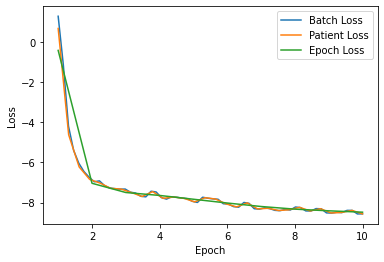

In [18]:
plt.plot(np.linspace(1, n_epochs, np.array(batch_loss_history).shape[0]), np.log(np.array(batch_loss_history)), label='Batch Loss')
plt.plot(np.linspace(1, n_epochs, np.array(patient_loss_history).shape[0]), np.log(np.array(patient_loss_history)), label='Patient Loss')
plt.plot(np.linspace(1, n_epochs, n_epochs), np.log(np.array(epoch_loss_history)), label='Epoch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Hay que mirar de hacer un test y validation e ir viendo su error en la grafica.